<a href="https://colab.research.google.com/github/Madoukcorp/DataScienceProject/blob/master/Ensemble_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ensemble Methods**


In [1]:
# Customer prediction using ensemble techniques

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


In [4]:
# load consultancy data
df = pd.read_csv('/content/Telco_customer_churn.csv')

In [5]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [7]:
df.dtypes

,0
CustomerID,object
Count,int64
Country,object
State,object
City,object
Zip Code,int64
Lat Long,object
Latitude,float64
Longitude,float64
Gender,object


In [9]:
# drop customerid from df
df.drop('CustomerID', axis=1, inplace=True)

In [11]:
# data preprocessing
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df.dropna(inplace=True)
df=pd.get_dummies(df,drop_first=True)


In [13]:
df.head()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,City_Adelanto,City_Adin,City_Agoura Hills,City_Aguanga,City_Ahwahnee,City_Albany,City_Alderpoint,City_Alhambra,City_Alpaugh,City_Alpine,City_Altadena,City_Alturas,City_Alviso,City_Amador City,City_Amboy,City_Anaheim,City_Anderson,City_Angels Camp,City_Angelus Oaks,City_Angwin,City_Annapolis,City_Antelope,City_Antioch,City_Anza,City_Apple Valley,City_Applegate,City_Aptos,City_Arbuckle,City_Arcadia,City_Armona,City_Arnold,City_Aromas,City_Atherton,City_Atwater,City_Auburn,City_Avalon,City_Avenal,City_Avery,City_Azusa,City_Badger,...,"Lat Long_41.932207, -120.135941","Lat Long_41.949216, -122.050062","Lat Long_41.950683, -124.097094","Lat Long_41.962127, -122.527696",Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn Reason_Attitude of support person,Churn Reason_Competitor had better devices,Churn Reason_Competitor made better offer,Churn Reason_Competitor offered higher download speeds,Churn Reason_Competitor offered more data,Churn Reason_Deceased,Churn Reason_Don't know,Churn Reason_Extra data charges,Churn Reason_Lack of affordable download/upload speed,Churn Reason_Lack of self-service on Website,Churn Reason_Limited range of services,Churn Reason_Long distance charges,Churn Reason_Moved,Churn Reason_Network reliability,Churn Reason_Poor expertise of online support,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction
0,1,90003,33.964131,-118.272783,2,53.85,108.15,1,86,3239,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,90005,34.059281,-118.307420,2,70.70,151.65,1,67,2701,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1,90006,34.048013,-118.293953,8,99.65,820.50,1,86,5372,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,1,90010,34.062125,-118.315709,28,104.80,3046.05,1,84,5003,Fa

In [15]:
df['Churn Value'].value_counts()
# define feature and targets
X = df.drop('Churn Score', axis=1)
y = df['Churn Score']




In [16]:
# split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#

In [18]:
# random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print('Random Forest Score:', rf_score)



Random Forest Score: 0.026737967914438502


In [21]:
# Decission and AdaBoost model
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
ada_score = ada.score(X_test, y_test)
print('AdaBoost Score:', ada_score)





AdaBoost Score: 0.034759358288770054


In [22]:
# Feature Ranking
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Feature Importances:')
print(feature_importances)

Feature Importances:
Total Charges                      0.036366
Monthly Charges                    0.035779
CLTV                               0.035638
Zip Code                           0.033826
Longitude                          0.033196
                                     ...   
Lat Long_37.872902, -122.303708    0.000000
City_Pine Grove                    0.000000
City_Platina                       0.000000
Lat Long_37.815459, -121.977203    0.000000
Count                              0.000000
Length: 2076, dtype: float64


Text(0.5, 1.0, 'Feature Importances')

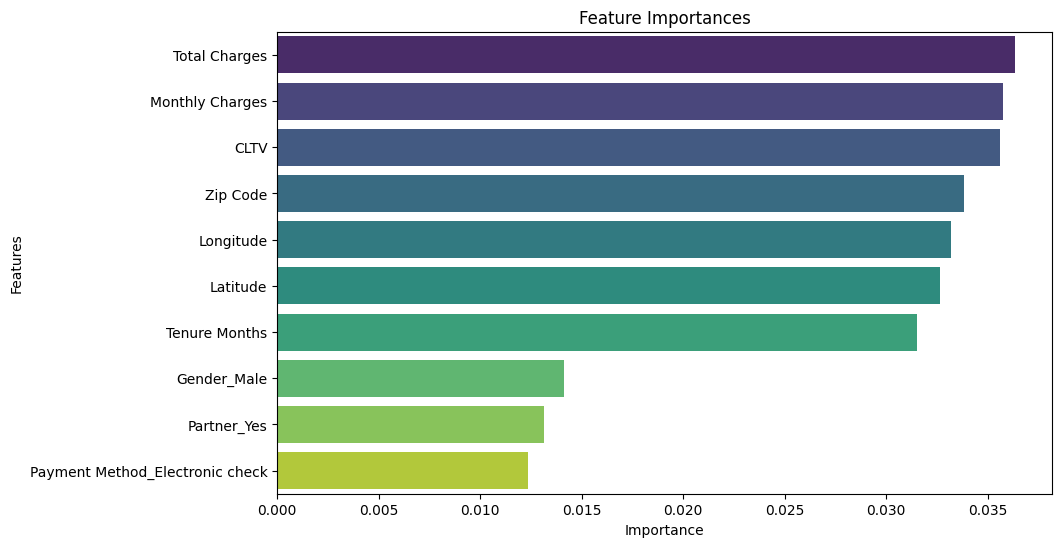

In [25]:
# plot feature Ranking of importan only imited
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[:10].values, y=feature_importances[:10].index, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')



In [26]:
# apply gradientboostingclassifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_score = gb.score(X_test, y_test)
print('Gradient Boosting Score:', gb_score)

Gradient Boosting Score: 0.029411764705882353


In [31]:
#Bagging and Boosting
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#Bagging and Boosting
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression()
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf), ('gb', gb)],
    voting='hard'
)
voting_clf.fit(X_train, y_train)
voting_score = voting_clf.score(X_test, y_test)
print('Voting Classifier Score:', voting_score)




In [ ]:
# using bagging classifier
bagging_clf = BaggingClassifier(base_estimator=rf, n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)
bagging_score = bagging_clf.score(X_test, y_test)
print('Bagging Classifier Score:', bagging_score)
